<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🧾Voting Classification (IRIS)🧾</div>

![](https://miro.medium.com/v2/resize:fit:1400/1*f6KbPXwksAliMIsibFyGJw.png)

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🧾Importing Libraries🧾</div>

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris-classification/IRIS.csv


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🧾Dataset Reading and Sample🧾</div>

In [2]:
df = pd.read_csv('/kaggle/input/iris-classification/IRIS.csv')

In [3]:
df.head().style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [4]:
# remove Id col
df = df.iloc[:,1:]

In [5]:
df.head().style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,sepal_width,petal_length,petal_width,species
0,3.500000,1.400000,0.200000,Iris-setosa
1,3.000000,1.400000,0.200000,Iris-setosa
2,3.200000,1.300000,0.200000,Iris-setosa
3,3.100000,1.500000,0.200000,Iris-setosa
4,3.600000,1.400000,0.200000,Iris-setosa


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🧾Label Encoder🧾</div>

In [6]:
encoder = LabelEncoder()

In [7]:
df['species'] = encoder.fit_transform(df['species'])

In [8]:
df.head().style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,sepal_width,petal_length,petal_width,species
0,3.500000,1.400000,0.200000,0
1,3.000000,1.400000,0.200000,0
2,3.200000,1.300000,0.200000,0
3,3.100000,1.500000,0.200000,0
4,3.600000,1.400000,0.200000,0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

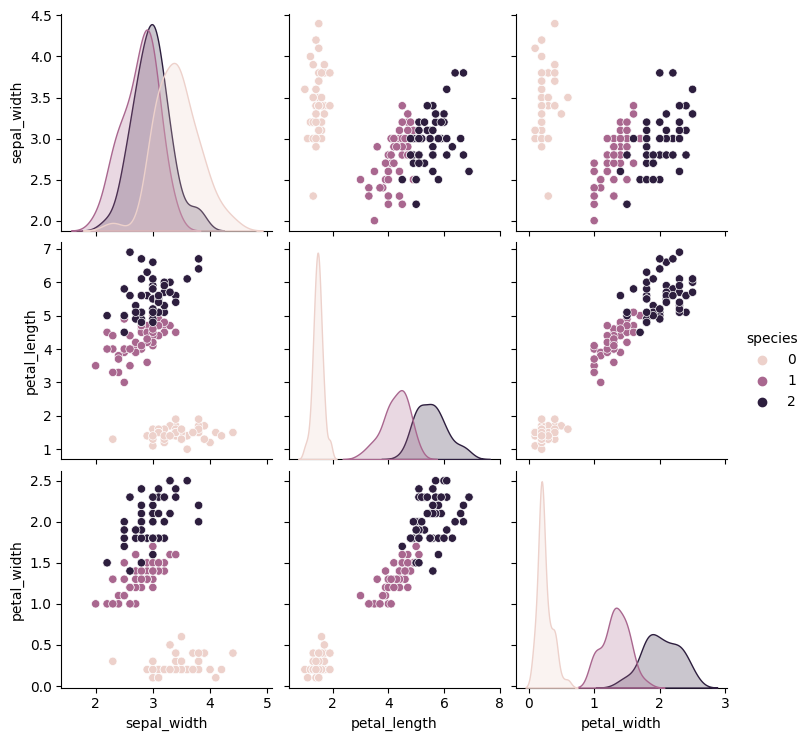

In [9]:
sns.pairplot(df,hue='species')

In [10]:
df.sample(5).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,sepal_width,petal_length,petal_width,species
87,2.300000,4.400000,1.300000,1
78,2.900000,4.500000,1.500000,1
120,3.200000,5.700000,2.300000,2
59,2.700000,3.900000,1.400000,1
53,2.300000,4.000000,1.300000,1


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🧾Selecting Columns🧾</div>

In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [13]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [14]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.95
rf 0.94
knn 0.95


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🧾Hard Voting🧾</div>

In [15]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.95


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🧾Soft Voting🧾</div>

In [16]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.95


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🧾Weighted Voting🧾</div>

In [17]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))
            

for i=1,j=1,k=1 0.95
for i=1,j=1,k=2 0.95
for i=1,j=1,k=3 0.95
for i=1,j=2,k=1 0.95
for i=1,j=2,k=2 0.95
for i=1,j=2,k=3 0.95
for i=1,j=3,k=1 0.95
for i=1,j=3,k=2 0.95
for i=1,j=3,k=3 0.95
for i=2,j=1,k=1 0.95
for i=2,j=1,k=2 0.95
for i=2,j=1,k=3 0.95
for i=2,j=2,k=1 0.95
for i=2,j=2,k=2 0.95
for i=2,j=2,k=3 0.95
for i=2,j=3,k=1 0.95
for i=2,j=3,k=2 0.95
for i=2,j=3,k=3 0.95
for i=3,j=1,k=1 0.95
for i=3,j=1,k=2 0.95
for i=3,j=1,k=3 0.95
for i=3,j=2,k=1 0.95
for i=3,j=2,k=2 0.95
for i=3,j=2,k=3 0.95
for i=3,j=3,k=1 0.95
for i=3,j=3,k=2 0.95
for i=3,j=3,k=3 0.95


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🧾Classifier Of Same Algo🧾</div>

In [18]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [19]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


![](https://static.fontget.com/t/h/thank-you/preview@2x.png)